## SI 670 Applied Machine Learning, Week 3: Regularization, Cross Validation, and Logistic Regression

For this assignment, you will be exercising on questions related to Logistic regression, Dummy classifiers, and cross-validation.

* The coding homework is worth 50 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f23-hw3-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



In [4]:
import sklearn

### Question 1 (20 points) Bias and Variance


Your task is to investigate the influence of different regularization parameters on the coefficients of a regression model.

Given 10 points around the function $y = x^2 + 2x + 1$. You are asked to train a linear regression with degree 6 polynomial features. And run it with different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$.

Plot the polynomials from your regression results corresponding to each regularization parameter in one figure.


In [13]:
def answer_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt

    x_list = [-10.38446879, -8.38394902, -5.47700112, -5.04337481, -1.50548227, 3.65324449, 2.32253022, 7.14588818, 7.44347003, 9.67771813]
    y_list = [ 73.21995367, 56.4250573, 24.15989601, 7.14325154, 3.45955269, 6.68448382, 17.93465674, 44.02585723, 79.55124013, 124.46649205]

    # Your code here
    
    poly = sklearn.preprocessing.PolynomialFeatures()
    x_poly = poly.fit_transform(np.array(x_list).reshape(-1, 1))
    
    linreg = LinearRegression().fit(x_poly, y_list)



    # Generate original x values
    x_original = np.linspace(-10, 10)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Plot the original function and the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x_list, y_list, label='Data Points', color='black')

    # Plot y = x^2 + 2x + 1
    plt.plot(x_original, y_original, label='y = x^2 + 2x + 1', color='red')

    # Plot the polynomials from your regression results here



    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# answer_1()

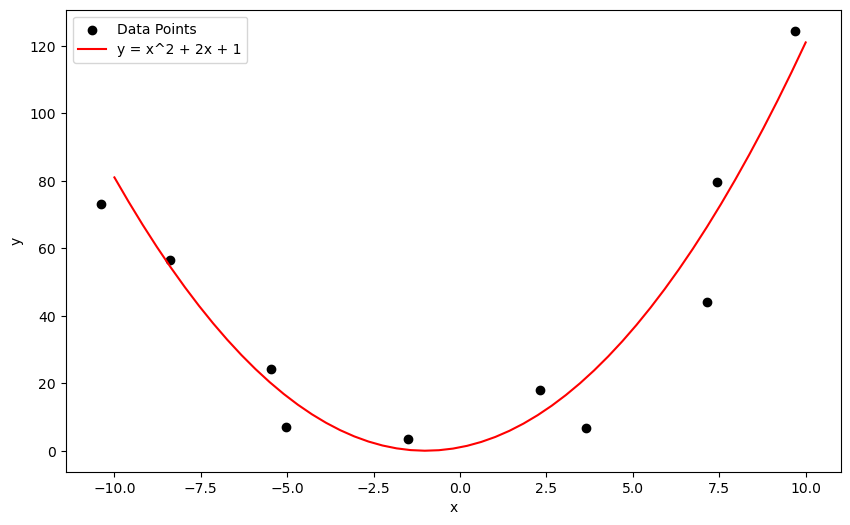

In [14]:
answer_1()

We then give you a data generator that gives 10 data points around the function $y = x^2 + 2x + 1$ each time.

Train a linear regression with degree 6 polynomial features for 1000 times to calculate the bias and variance.

Apply different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$

return a tuple containing two lists:

The first list should contain the bias values at $x^*=0, y^*=1$ corresponding to each regularization parameter. The second list should contain the variance values at $x^*=0, y^*=1$ corresponding to each regularization parameter.

Briefly describe how the bias and variance change when the regularization parameter increases.

In [ ]:
def data_gen():
    # Number of data points
    n = 10

    # Generate original x values: you can choose the range and number of points
    x_original = np.linspace(-10, 10, n)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Add some noise to x and y values
    noise_strength_x = 1.0  # Control the noise strength for x
    noise_strength_y = 5.0  # Control the noise strength for y

    x_noisy = x_original + noise_strength_x * np.random.randn(n)
    y_noisy = y_original + noise_strength_y * np.random.randn(n)

    return x_noisy, y_noisy


def answer_1_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression

    bias_list = []
    variance_list = []

    # your code here




    return bias_list, variance_list

# answer_1_1()

**Your answer here.**

### Question 2 (15 points) Cross-validation for very small datasets.

We talked about splitting data in training/validation/test.  However, when you have a very small dataset, one issue is that it leads to really tiny validation/test sets, which leads to unreliable test evaluation scores. For example, if you have a dataset with a total of 60 samples, and hold back 25% as a final test set, you'll get a final test set with 15 samples. In this case, a single evaluation score based on merely 15 samples could be very unreliable and probably not something to be relied on heavily.

So to make evaluation more reliable, we discussed how people usually use *cross-validation* to generate *multiple* evaluation scores, each on a different train/test split of the data. That is, you split the train and test set multiple times and then calculate the average of the resulting test scores. This is the approach we'll use to estimate a more reliable final test set score.  We don't want to use these final test sets to also tune our hyperparameters, so we make sure to learn the model and tune the hyperparameters using only the data in the training split.  To do that, we do a second cross-validation *within the training data split* so that we have (i) an outer test set and (ii) a separate in cross-validation that produces several inner *training/validation split's* that's used to pick the best configuration/hyper-parameters.

Use an outer cross validation with $k=5$ folds, and an inner cross-validation with $k'=3$ folds.  Report the average of the final test set scores you got across all $k=5$ folds.  

To simulate a small dataset scenario, we have provided the code that selects the first 60 samples from the built-in diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). We've also given you the variable 'alpha_list', which has the range of ridge regression hyperparameter alphe you should use for tuning.

Write the code that implements the above scheme on this subset of the boston dataset. You can split the whole dataset into $k=5$ outer folds (step 1) by using the handy `KFold` function (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). In each outer fold, you can then use another `KFold` to split the training data of the outer fold into $k'=3$ inner folds (step 2). In each inner fold, train a Ridge regression model, and use the validation set to evaluate (step 2a). Then you can find the optimal hyper-parameter alpha value within each outer fold (step 2b). Get the final test set score using this optimal model (step 2c). Repeat for all $k=5$ folds to obtain a set of final test scores. (step 3)

Finally, you need to return the mean value of the $k=5$ final test scores. This is your final (more reliable) test set prediction.

In [ ]:
def answer_2():
    from sklearn.datasets import load_diabetes
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold

    X,y = load_diabetes(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    alpha_list = [0.001,0.01,0.1,1,10]

    # Your code here

    return mean_test_score

# answer_2()

### Question 3 (15 points) Regression to the mean

Imagine you are working on a regression problem with three features.

You will:

1. Generate synthetic data.

2. Split data into training, validation, and test sets, with a ratio of 6:2:2

3. Train two different linear regression models (one with Ridge regularization term with $\alpha = 0.2$ and the other without).

4. Evaluate both models on the validation data with Mean Squared Error.

5. Suppose that for each time you will apply the "better" model according to the MSE on the validation data, evaluate it on the test data.

Repeat this 1000 times.  Each time calculate the average of the error of the "better" model on validation data and test data respectively (so you will only record the error of the better model on the validation data, and the error of this same model on the test data.

Which average error is smaller? Why do you expect this (or not expect this)?

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def answer_3():
    avg_val_error = []
    avg_test_error = []

    for _ in range(1000):

        # Generate synthetic data
        X = 2 * np.random.rand(50, 6)  # 50 samples, 6 features
        y = 10 + np.dot(X, np.array([3, 5, 2, 0, 0, 0])) + 2 * np.random.randn(50)

        # Your code here
        # Split data into training, validation, and test sets, with a ratio of 6:2:2
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)



        # Train two models
        # Model 1: Linear Regression
        linreg = LinearRegression().fit(X_train, y_train)


        # Model 2: Ridge Regression with alpha = 0.2
        ridge = Ridge(alpha = 0.2).fit(X_train, y_train)


        # Evaluate on validation set
        linreg_predictions = linreg.predict(X_val)
        ridge_predictions = ridge.predict(X_val)
        
        val_mse1 = mean_squared_error(linreg_predictions, y_val)
        val_mse2 = mean_squared_error(ridge_predictions, y_val)

        print(f"Validation MSE for Linear Regression: {val_mse1}")
        print(f"Validation MSE for Ridge Regression: {val_mse2}")

        # Choose the "better" model based on validation MSE
        choice, choice_mse = (linreg, val_mse1) if val_mse1 < val_mse2 else (ridge, val_mse2)


        # Evaluate 'better' model on the test set
        better_predictions = choice.predict(X_test)
        test_mse = mean_squared_error(better_predictions, y_test)

        print(f"Test MSE for the 'better' model: {test_mse}")
        
        avg_test_error.append(test_mse)
        avg_val_error.append(choice_mse)
        
    
    return (stayed_best, worse, np.mean(avg_test_error), np.mean(avg_val_error))


stayed_best, worse, avg_test_error, avg_val_error = answer_3()

Validation MSE for Linear Regression: 4.335139997537073
Validation MSE for Ridge Regression: 4.48676202085996
Test MSE for the 'better' model: 7.043157931573857
Validation MSE for Linear Regression: 4.451301382070633
Validation MSE for Ridge Regression: 4.578174299069472
Test MSE for the 'better' model: 6.10967253841201
Validation MSE for Linear Regression: 1.9328121123405198
Validation MSE for Ridge Regression: 1.8883931428343572
Test MSE for the 'better' model: 5.443151484657973
Validation MSE for Linear Regression: 5.892391153052875
Validation MSE for Ridge Regression: 5.9335908447773935
Test MSE for the 'better' model: 4.367476356085102
Validation MSE for Linear Regression: 5.131534702606107
Validation MSE for Ridge Regression: 5.160507913445592
Test MSE for the 'better' model: 4.265717404581119
Validation MSE for Linear Regression: 5.962807125643897
Validation MSE for Ridge Regression: 5.911080372064157
Test MSE for the 'better' model: 6.337360461530205
Validation MSE for Linear R

Validation MSE for Linear Regression: 3.9990744380221543
Validation MSE for Ridge Regression: 4.043712398223198
Test MSE for the 'better' model: 3.4933402281125425
Validation MSE for Linear Regression: 2.1427177359930374
Validation MSE for Ridge Regression: 2.1510461498718807
Test MSE for the 'better' model: 3.2984878846842642
Validation MSE for Linear Regression: 3.421419340720142
Validation MSE for Ridge Regression: 3.338827702419228
Test MSE for the 'better' model: 6.056566280471325
Validation MSE for Linear Regression: 1.790743878621516
Validation MSE for Ridge Regression: 1.7304540699727595
Test MSE for the 'better' model: 4.201689322305427
Validation MSE for Linear Regression: 5.085228568353948
Validation MSE for Ridge Regression: 5.150924222641959
Test MSE for the 'better' model: 3.8513488901984916
Validation MSE for Linear Regression: 7.462135930432178
Validation MSE for Ridge Regression: 7.1398385720531525
Test MSE for the 'better' model: 3.7529046310607974
Validation MSE for 

Validation MSE for Linear Regression: 4.389143489979225
Validation MSE for Ridge Regression: 4.444192351591577
Test MSE for the 'better' model: 7.257224101208084
Validation MSE for Linear Regression: 4.413409425466995
Validation MSE for Ridge Regression: 4.426693046012372
Test MSE for the 'better' model: 3.2934741425186402
Validation MSE for Linear Regression: 12.53477010556605
Validation MSE for Ridge Regression: 12.226167705882647
Test MSE for the 'better' model: 4.963548236458566
Validation MSE for Linear Regression: 4.133325175154287
Validation MSE for Ridge Regression: 4.004921353556538
Test MSE for the 'better' model: 6.967880303469092
Validation MSE for Linear Regression: 5.535058799704975
Validation MSE for Ridge Regression: 5.335641180490223
Test MSE for the 'better' model: 3.9269215104604536
Validation MSE for Linear Regression: 3.9600865397323646
Validation MSE for Ridge Regression: 3.890265098837916
Test MSE for the 'better' model: 2.0426387609765033
Validation MSE for Line

Validation MSE for Linear Regression: 7.499198114486586
Validation MSE for Ridge Regression: 7.399561293466073
Test MSE for the 'better' model: 4.390418126187301
Validation MSE for Linear Regression: 5.275389680716827
Validation MSE for Ridge Regression: 5.499082781218648
Test MSE for the 'better' model: 2.6110245801223706
Validation MSE for Linear Regression: 2.889332751259522
Validation MSE for Ridge Regression: 2.759889782029508
Test MSE for the 'better' model: 4.048427549797101
Validation MSE for Linear Regression: 6.5330528322365895
Validation MSE for Ridge Regression: 6.636679578235558
Test MSE for the 'better' model: 2.348411609540025
Validation MSE for Linear Regression: 4.112760522973671
Validation MSE for Ridge Regression: 4.0248656315722835
Test MSE for the 'better' model: 8.209534474098799
Validation MSE for Linear Regression: 3.34682888569568
Validation MSE for Ridge Regression: 3.3182059268803705
Test MSE for the 'better' model: 3.6329581196313194
Validation MSE for Linea

Validation MSE for Linear Regression: 6.910340645722317
Validation MSE for Ridge Regression: 6.515359945513657
Test MSE for the 'better' model: 6.811845698386368
Validation MSE for Linear Regression: 6.794675229645547
Validation MSE for Ridge Regression: 6.84672907610841
Test MSE for the 'better' model: 5.190965687677642
Validation MSE for Linear Regression: 1.5588582760930538
Validation MSE for Ridge Regression: 1.6310932083512681
Test MSE for the 'better' model: 9.072936237961644
Validation MSE for Linear Regression: 1.9958876997785473
Validation MSE for Ridge Regression: 1.9060559176465564
Test MSE for the 'better' model: 3.398830031494222
Validation MSE for Linear Regression: 6.538938259305731
Validation MSE for Ridge Regression: 6.381643375830988
Test MSE for the 'better' model: 3.5651759812660857
Validation MSE for Linear Regression: 5.829135349087219
Validation MSE for Ridge Regression: 5.756691623538244
Test MSE for the 'better' model: 7.237811403753516
Validation MSE for Linea

Validation MSE for Linear Regression: 4.174197812353698
Validation MSE for Ridge Regression: 4.006478845026114
Test MSE for the 'better' model: 2.9781897393325356
Validation MSE for Linear Regression: 8.718160970594537
Validation MSE for Ridge Regression: 8.743212771215138
Test MSE for the 'better' model: 7.367297083482512
Validation MSE for Linear Regression: 5.458653679621997
Validation MSE for Ridge Regression: 5.546099991821719
Test MSE for the 'better' model: 7.296031849306535
Validation MSE for Linear Regression: 7.932126179122062
Validation MSE for Ridge Regression: 8.123192942122303
Test MSE for the 'better' model: 8.629944061831562
Validation MSE for Linear Regression: 3.8617636314586954
Validation MSE for Ridge Regression: 3.9587810017306766
Test MSE for the 'better' model: 2.1903222701192044
Validation MSE for Linear Regression: 7.571501711311351
Validation MSE for Ridge Regression: 7.689431451108635
Test MSE for the 'better' model: 7.474115898673536
Validation MSE for Linea

Test MSE for the 'better' model: 3.822351891195102
Validation MSE for Linear Regression: 4.106864457149819
Validation MSE for Ridge Regression: 4.244483126179219
Test MSE for the 'better' model: 5.392394488773508
Validation MSE for Linear Regression: 0.6125395754555275
Validation MSE for Ridge Regression: 0.6111930636176456
Test MSE for the 'better' model: 4.425325940475785
Validation MSE for Linear Regression: 5.541156534156569
Validation MSE for Ridge Regression: 5.45883546081424
Test MSE for the 'better' model: 2.1630382329916253
Validation MSE for Linear Regression: 5.880116045938012
Validation MSE for Ridge Regression: 5.9659471153998735
Test MSE for the 'better' model: 4.178663765352021
Validation MSE for Linear Regression: 5.0305302680113115
Validation MSE for Ridge Regression: 4.693850843185752
Test MSE for the 'better' model: 6.330001094853357
Validation MSE for Linear Regression: 6.414996797352626
Validation MSE for Ridge Regression: 6.137682953777402
Test MSE for the 'better

Validation MSE for Linear Regression: 2.0982160852606917
Validation MSE for Ridge Regression: 1.9235113727280524
Test MSE for the 'better' model: 6.80418550902438
Validation MSE for Linear Regression: 4.493506170261302
Validation MSE for Ridge Regression: 4.755048174266564
Test MSE for the 'better' model: 3.4205420302641243
Validation MSE for Linear Regression: 6.499371232282042
Validation MSE for Ridge Regression: 6.200798271953487
Test MSE for the 'better' model: 4.3873356668988635
Validation MSE for Linear Regression: 3.818711188043781
Validation MSE for Ridge Regression: 3.7730140591786965
Test MSE for the 'better' model: 4.12445692612037
Validation MSE for Linear Regression: 2.4521828377851276
Validation MSE for Ridge Regression: 2.304725651099192
Test MSE for the 'better' model: 6.418912578421202
Validation MSE for Linear Regression: 6.330114951931271
Validation MSE for Ridge Regression: 6.241323149843301
Test MSE for the 'better' model: 5.572935604717443
Validation MSE for Linea

Validation MSE for Linear Regression: 3.8560377549550857
Validation MSE for Ridge Regression: 3.808715147731335
Test MSE for the 'better' model: 4.786118614837467
Validation MSE for Linear Regression: 3.7025475090506474
Validation MSE for Ridge Regression: 3.568415759841821
Test MSE for the 'better' model: 8.285364597422411
Validation MSE for Linear Regression: 4.391628580908873
Validation MSE for Ridge Regression: 4.4162020530731
Test MSE for the 'better' model: 3.8659023866404567
Validation MSE for Linear Regression: 3.153060519722641
Validation MSE for Ridge Regression: 2.945143641270278
Test MSE for the 'better' model: 6.211147475330465
Validation MSE for Linear Regression: 1.160189754466491
Validation MSE for Ridge Regression: 1.187554987166125
Test MSE for the 'better' model: 3.449778573675304
Validation MSE for Linear Regression: 7.786343938550165
Validation MSE for Ridge Regression: 7.287842890756579
Test MSE for the 'better' model: 8.173672672999047
Validation MSE for Linear R

Validation MSE for Linear Regression: 2.0417980868407803
Validation MSE for Ridge Regression: 2.129482186855707
Test MSE for the 'better' model: 6.201724627630675
Validation MSE for Linear Regression: 7.259304005157868
Validation MSE for Ridge Regression: 7.141148939549517
Test MSE for the 'better' model: 2.030112967313609
Validation MSE for Linear Regression: 6.450330485486305
Validation MSE for Ridge Regression: 6.18328775690772
Test MSE for the 'better' model: 3.5872735645275164
Validation MSE for Linear Regression: 3.8490139877803657
Validation MSE for Ridge Regression: 4.121810661290932
Test MSE for the 'better' model: 6.167578843868493
Validation MSE for Linear Regression: 3.585794074201445
Validation MSE for Ridge Regression: 3.504126310109302
Test MSE for the 'better' model: 3.1823823500257418
Validation MSE for Linear Regression: 2.751208436830946
Validation MSE for Ridge Regression: 2.9047116294071222
Test MSE for the 'better' model: 2.2294209168195978
Validation MSE for Line

Validation MSE for Linear Regression: 3.5919247583673424
Validation MSE for Ridge Regression: 3.5829515813211317
Test MSE for the 'better' model: 1.3829690299862072
Validation MSE for Linear Regression: 3.6673930630057625
Validation MSE for Ridge Regression: 3.5767765967543044
Test MSE for the 'better' model: 9.250114716574847
Validation MSE for Linear Regression: 5.92603060898194
Validation MSE for Ridge Regression: 5.986265895341296
Test MSE for the 'better' model: 4.389018983509123
Validation MSE for Linear Regression: 8.186419081033524
Validation MSE for Ridge Regression: 8.07850331830326
Test MSE for the 'better' model: 2.0023117918871933
Validation MSE for Linear Regression: 4.846504910839949
Validation MSE for Ridge Regression: 4.81800396385552
Test MSE for the 'better' model: 7.184242959393998
Validation MSE for Linear Regression: 6.161361670023943
Validation MSE for Ridge Regression: 6.295425322541136
Test MSE for the 'better' model: 4.92928516235886
Validation MSE for Linear 

Validation MSE for Linear Regression: 4.699135145209139
Validation MSE for Ridge Regression: 4.779310099807516
Test MSE for the 'better' model: 2.2934979080675637
Validation MSE for Linear Regression: 3.9297367301478365
Validation MSE for Ridge Regression: 3.944138530976224
Test MSE for the 'better' model: 4.203410474543812
Validation MSE for Linear Regression: 12.690216832867845
Validation MSE for Ridge Regression: 11.998592131400923
Test MSE for the 'better' model: 7.195218254294579
Validation MSE for Linear Regression: 7.412123267480517
Validation MSE for Ridge Regression: 7.364886573848741
Test MSE for the 'better' model: 4.046813448970566
Validation MSE for Linear Regression: 2.1534808937817695
Validation MSE for Ridge Regression: 2.130835975717851
Test MSE for the 'better' model: 1.6773095993867266
Validation MSE for Linear Regression: 7.028962812704277
Validation MSE for Ridge Regression: 7.054983883630418
Test MSE for the 'better' model: 3.502569397802233
Validation MSE for Lin

Validation MSE for Linear Regression: 6.954345076684558
Validation MSE for Ridge Regression: 6.773033959533289
Test MSE for the 'better' model: 9.145764197294671
Validation MSE for Linear Regression: 3.186952334253535
Validation MSE for Ridge Regression: 3.112330258053493
Test MSE for the 'better' model: 3.6221663412379916
Validation MSE for Linear Regression: 4.869264882953716
Validation MSE for Ridge Regression: 4.754888860197889
Test MSE for the 'better' model: 5.297611028962475
Validation MSE for Linear Regression: 7.674712223752709
Validation MSE for Ridge Regression: 7.977888631076307
Test MSE for the 'better' model: 3.6659151236099476
Validation MSE for Linear Regression: 7.5590312517858775
Validation MSE for Ridge Regression: 7.463118257772716
Test MSE for the 'better' model: 4.5291018276670325
Validation MSE for Linear Regression: 6.191371885349296
Validation MSE for Ridge Regression: 6.252040433223927
Test MSE for the 'better' model: 7.168506156252455
Validation MSE for Linea

Validation MSE for Linear Regression: 8.355700068663786
Validation MSE for Ridge Regression: 8.65036463919562
Test MSE for the 'better' model: 4.306520219635938
Validation MSE for Linear Regression: 4.72249150784207
Validation MSE for Ridge Regression: 4.524189817641074
Test MSE for the 'better' model: 9.846842539317667
Validation MSE for Linear Regression: 1.6404155469458548
Validation MSE for Ridge Regression: 1.558150386337437
Test MSE for the 'better' model: 7.933738119533089
Validation MSE for Linear Regression: 4.996360325472964
Validation MSE for Ridge Regression: 4.666199851514497
Test MSE for the 'better' model: 15.819448675499237
Validation MSE for Linear Regression: 2.7596990402775172
Validation MSE for Ridge Regression: 2.7470685415151594
Test MSE for the 'better' model: 6.865287227741689
Validation MSE for Linear Regression: 5.622601923689244
Validation MSE for Ridge Regression: 5.654187606516183
Test MSE for the 'better' model: 6.963939050553316
Validation MSE for Linear 

In [40]:
stayed_best, worse, avg_test_error, avg_val_error

(513, 487, 5.211114583986284, 5.071022425275132)

The average test error is larger than the average validation error. This is likely because of regression to the mean. Whennever we're comparing two classifiers performance, we generally expect the better performing classifier to do worse in subsequent evaluations. In fact, the estimate of the best predictor will likely be upwardly biased.

Whenever, we train a classifier, there is some degree of signal and noise in our estimate. Often, noise can cause a classifier to overperform and lead us to think it has a higher accuracy than it actually does. But when noise is removed, top-performing classifiers tend to regress toowards the mean. In other words, we may get lucky and achieve very high accuracy with a classifier sometimes, but we know we won't always be lucky — with subsequent evaluations, our average performance will converge back to the expected value. 